# Tutorial: Decision Tree

In this tutorial, we will build a decision tree model to predict whether a person on the Titanic will survive


**Data Features and meanings**
- survival
    - Survival - 0 = No, 1 = Yes
- pclass
    - Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd
- sex
    - Sex	
- Age
    - Age in years	
- sibsp
    - #of siblings / spouses aboard the Titanic	
- parch
    - #of parents / children aboard the Titanic	
- ticket
    - Ticket number	
- fare
    - Passenger fare	
- cabin
    - Cabin number	
- embarked
    - Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

## Part 1: Load  data

In [ ]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Your code here
titanic_data = pd.read_csv("titanic.csv")

In [ ]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Removing Columns With Too Much Missing Data

In [ ]:
titanic_data.drop('Cabin', axis=1, inplace = True)

### Removing Null Data From Our Data Set

In [ ]:
# Check missing value in data
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
# drop Missing value
titanic_data.dropna(inplace = True)

In [ ]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
male           0
Q              0
S              0
dtype: int64

### Handling Categorical Data With Dummy Variables

In [ ]:
# to avoid multicollinearity
titanic_data=pd.get_dummies(titanic_data,columns=['Sex','Embarked'],prefix='',prefix_sep='',drop_first = True)

In [ ]:
# check dataframe columns
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'male', 'Q', 'S'],
      dtype='object')

Removing some columns we decide not to use from the dataset

In [ ]:
titanic_data.drop(['PassengerId','Name', 'Ticket'], axis = 1, inplace = True)

In [ ]:
# check dataframe columns
titanic_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

correlation

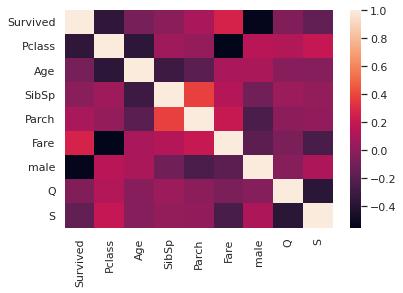

In [ ]:
sns.heatmap(titanic_data.corr())

## Train/Test separation

X/y separation

In [ ]:
x_data = titanic_data.drop(columns = ['Survived'])
y_data = titanic_data['Survived']

Perform hold-out method
- 70% training set
- 30% testing set

In [ ]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3,random_state=0)

# Part 3: Train a decision tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0, criterion='entropy')
model

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
model.fit(x_training_data, y_training_data)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Making Predictions With Our Model

In [ ]:
predictions = model.predict(x_test_data)

### Part 4: Model Evaluation

Evaluation metrics
- confusion metrix
- accuracy
- precision, recall, f1-score

Measuring the Performance

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Accuracy:\t %.3f" %accuracy_score(y_test_data, predictions))
print(classification_report(y_test_data, predictions))

Accuracy:	 0.766
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       125
           1       0.71      0.75      0.73        89

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



confusion matrix

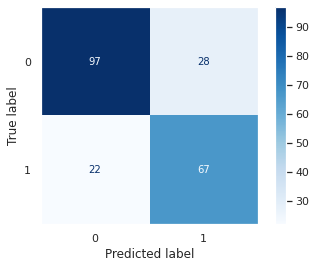

In [ ]:
from sklearn.metrics import plot_confusion_matrix
cm = plot_confusion_matrix(model,x_test_data, y_test_data,cmap="Blues",values_format='.3g');
plt.grid(None)
plt.show()

Visualizing the decision tree

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None, 
                              feature_names=x_training_data.columns,
                              class_names=['0','1'],
                              filled=True, rounded=True,
                              special_characters=True, rotate=True)
graph = graphviz.Source(dot_data)
graph.render('dtree_render')

'dtree_render.pdf'

### Part 5: Model tuning

#### Try tuning the model to see if you can make it perform better?


You can look at the parameters and functions of Decision Tree Classifier at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Try tuning Hyperparameter
***Note that to do this properly, you should split data into train/validation/test set and tune them on validation set, not test set***


In [25]:
model = DecisionTreeClassifier(criterion='entropy', 
                               splitter='best', 
                               max_depth=3, 
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               min_weight_fraction_leaf=0.0, 
                               max_features=None, 
                               random_state=None, 
                               max_leaf_nodes=None, 
                               min_impurity_decrease=0.0, 
                               class_weight=None, 
                               ccp_alpha=0.0)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
print("Accuracy:\t %.3f" %accuracy_score(y_test_data, predictions))
print(classification_report(y_test_data, predictions))

Accuracy:	 0.771
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       125
           1       0.74      0.69      0.71        89

    accuracy                           0.77       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



## Feature importance

[0.20668913 0.09142059 0.02607017 0.         0.15537947 0.52044065
 0.         0.        ]


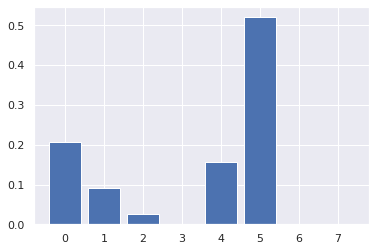

In [26]:
importances = model.feature_importances_
print(importances)

from matplotlib import pyplot
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [27]:
x_data.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')